In [18]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import pandas as pd
import time
import tqdm
import DFE_tracking as dfe
import sys
sys.path.append("..")
from utils.utils_joscha import *
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
path = "../../Preprocess/data/crop_image_handmole_20_20_avg/"
filenames=sorted_alphanumeric(os.listdir(path))
filenames = filenames[0:] ##
print(len(filenames))

40


../../Preprocess/data/crop_image_handmole_20_20_avg/
crop_image_0_avg.png


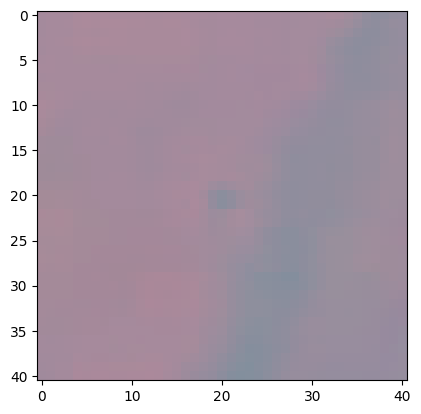

In [22]:
window_size=(31,31)
new_size=(420,300)
print(path)
print(filenames[0])
img=cv2.imread(path+filenames[0])
orgimg_shape = img.shape
ImgCopy = img.copy()
# mask, img = remove_bg(img)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)  # rotate
# img=cv2.resize(img,(new_size[0],new_size[1]))
# img=cv2.resize(img,(new_size[1],new_size[0]))
img=convertRGB2CIELab(img)
clone = img.copy()
plt.imshow(clone)
plt.show()


In [23]:
centers = []

img=cv2.imread(path+filenames[0])
orgimg_shape = img.shape
ImgCopy = img.copy()

initial_point = (int(orgimg_shape[0]/2), int(orgimg_shape[1]/2))
x1 = int(initial_point[0]-window_size[0]/2)
x2 = int(initial_point[0]+window_size[0]/2)
y1 = int(initial_point[1]-window_size[1]/2)
y2 = int(initial_point[1]+window_size[1]/2)
stride = 1
frame_idx = 0
rect_list = []
center_set = []
key = cv2.waitKey(0)
while True:
    clone = ImgCopy.copy()
    if key == ord('w'):
        y1 -= stride
        y2 -= stride
    if key == ord('s'):
        y1 += stride
        y2 += stride
    if key == ord('a'):
        x1 -= stride
        x2 -= stride
    if key == ord('d'):
        x1 += stride
        x2 += stride
    if key == ord('z'):
        if stride == 1:
            stride = 10
        else:
            stride = 1

    # if key == ord('m'):  # move frame
    #     frame_idx += 1
    # if key == ord('n'):
    #     frame_idx -= 1
    # if frame_idx < len(filenames):
    #     img = cv2.imread(path+filenames[frame_idx])
    #     clone = img.copy()

    if key == ord('r'):  # refresh img
        rect_list = []
        center_set = []
    if key == 13:
        print("Select center at: " +
                str([int(x1+window_size[0]/2), int(y1+window_size[0]/2)]))
        print("x1, y1, x2, y2: " + str([x1, y1, x2, y2]))
        center = [int(x1+window_size[0]/2), int(y1+window_size[0]/2)]
        rect_list.append([x1, y1, x2, y2])
        center_set.append(
            [int(x1+window_size[0]/2), int(y1+window_size[0]/2)])
        centers.append([int(x1+window_size[0]/2), int(y1+window_size[0]/2)])
        

    for i in range(len(rect_list)):
        coor = rect_list[i]
        cv2.rectangle(clone, (coor[0], coor[1]),
                        (coor[2], coor[3]), (0, 255, 0), 2)
        cv2.circle(clone, (int(coor[0]+window_size[0]/2),
                    int(coor[1]+window_size[1]/2)), 3, (0, 255, 0), 2)

    cv2.rectangle(clone, (x1, y1), (x2, y2), (0, 0, 255), 2)
    cv2.circle(
        clone, (int(x1+window_size[0]/2), int(y1+window_size[1]/2)), 3, (0, 0, 255), 2)
    cv2.putText(clone, "stride: " + str(stride), (10, 10),
                cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.7, (0, 255, 255), 1, cv2.LINE_AA)
    cv2.imshow("Select thumb first after that select index finger", clone)
    key = cv2.waitKey(0)
    if key == ord('q'):
        clone = ImgCopy.copy()
        for i in range(len(rect_list)):
            coor = rect_list[i]
        
            cv2.rectangle(clone, (coor[0], coor[1]),
                            (coor[2], coor[3]), (0,0 , 255), 2)
            cv2.putText(clone,"Point "+str(i+1), (coor[0], coor[1]),cv2.FONT_HERSHEY_COMPLEX,0.6, (0,0,0), 2)
            # cv2.circle(clone, (int(
            #     coor[0]+window_size[0]/2), int(coor[1]+window_size[1]/2)), 3, (0, 255, 0), 2)

            # img_save_path = os.path.dirname(path[:-1])
            # cv2.imwrite(img_save_path + f"/{initial_point[0]}.jpg", clone)
        img_save_path = os.path.dirname(path)
        cv2.imwrite(img_save_path + f"_targets.jpg", clone)

        cv2.destroyAllWindows()
        break

print(f"Comfirm center set at: {center_set}")
# np.save("./centers.npy", centers)

Select center at: [21, 21]
x1, y1, x2, y2: [6, 6, 37, 37]
Comfirm center set at: [[21, 21]]


In [24]:

print("Center is :\n",center_set)
# print(center_set[0])
print("x1, y1, x2, y2 :\n",rect_list)

Center is :
 [[21, 21]]
x1, y1, x2, y2 :
 [[6, 6, 37, 37]]


In [25]:
save_path = "./result/"
if not os.path.isdir(save_path):
    os.mkdir(save_path)


In [26]:
# %cd "C:\QuantPD_data\Process_Video_DfeTracking"
# import DFE_tracking
img_path = path
center = center_set
first_name = "03555114_L_L_deflicker"
name = [first_name + f"_point1_{center[0][0]} {center[0][1]}", first_name]
preds = dfe.DFE_tracking(img_path, center, save_path, name)
np.save(save_path + f"{name[0]}_preds.npy", preds)

Got 40 files
ref_crop =  (31, 31, 3)
Center at [21, 21], crop corr is (6, 37, 6, 37)
(128,)
start creating ssr_data
finish creating ssr_data
1/1 [==============================] - 0s 434ms/step
initial threshold 1.110243558883667
1/1 [==============================] - 0s 16ms/step
crop shape is (30, 31, 3)
1/1 [==============================] - 0s 17ms/step
crop shape is (30, 30, 3)
crop shape is (30, 30, 3)
crop shape is (30, 31, 3)
crop shape is (31, 30, 3)
1/1 [==============================] - 0s 19ms/step


In [31]:
def plot_result(result_path, img_path, save_path, frame_num = 0, save_result=False, point_num = 1):
    result = np.load(result_path)
    path = img_path
    filenames=sorted_alphanumeric(os.listdir(path))
#     filenames = filenames[734::]#bbox_center = bbox_center[:300]
    print()
#     new_size=(400,300)
    window_size = (31,31)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    count = 0
    for i in range(len(result)):
        img=cv2.imread(path+filenames[i])
        # img=cv2.resize(img,(new_size[0],new_size[1]))
        x1 = int(result[i][0]-window_size[0]/2)
        x2 = int(result[i][0]+window_size[0]/2)
        y1 = int(result[i][1]-window_size[1]/2)
        y2 = int(result[i][1]+window_size[1]/2)

        cv2.rectangle(img, (x1,y1), (x2,y2), (0,0,255), 2)
        # cv2.putText(img,f"Point {point_num}", (x1, y1),cv2.FONT_HERSHEY_COMPLEX,0.4, (0,0,0), 2)
        cv2.imwrite(save_path+"{count}.jpg".format(count=count), img)
        count += 1
    print("save result at " + save_path)

In [35]:
######point 1, 2##############
# predict_path = "./result/finger_tapping_R_L_point1_201 295_preds.npy"
# predict_path2 = "./result/finger_tapping_R_L_point2_175_283_preds.npy"
predict_path = "../finger_tapping_R_L_cotracker_point1_coords.npy"
predict_path2 = "../finger_tapping_R_L_cotracker_point2_coords.npy"
img_path = path

# img_path = "result_visualize/03555114_DFE_R_B/"
save_path = "./result_plot/"
plot_result(predict_path, img_path, save_path, frame_num = 99999, save_result=True, point_num = 1)
img_path2 = "./result_plot/"
plot_result(predict_path2, img_path2, save_path, frame_num = 99999, save_result=True, point_num = 2)


save result at ./result_plot/

save result at ./result_plot/


In [8]:
#### all points#####
pred_path = "./result/finger_tapping_R_L/"
files = sorted_alphanumeric(os.listdir(pred_path))
for i in range(len(files[:6])):
    predict_path = pred_path+files[i]
    img_path = path
    save_path = "./result_plot/"
    plot_result(predict_path, img_path, save_path, frame_num = 99999, save_result=True)


save result at ./result_plot/

save result at ./result_plot/
